In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import mdtraj as md
import numpy as np

In [25]:
crystal = md.load('1ubq.pdb')
Alphafold_result = md.load(r'rcsb_pdb_1UBQ/ranked_0.pdb')
Colabfold_result = md.load('UBIQUITIN_ddead_unrelaxed_rank_1_model_4.pdb')

crystal_backbone = crystal.top.select("backbone")
Alpha_backbone = md.rmsd(Alphafold_result, crystal, 0, atom_indices=crystal_backbone)
Alpha_backbone = Alpha_backbone.tolist()
Colab_backbone = md.rmsd(Colabfold_result, crystal, 0, atom_indices=crystal_backbone)
Colab_backbone = Colab_backbone.tolist()

"alpha_Backbone", Alpha_backbone, "Colab_backbone", Colab_backbone

('alpha_Backbone',
 [1.2934014797210693],
 'Colab_backbone',
 [0.16840030252933502])

In [29]:
crystal_sidechain = crystal.top.select("sidechain")
Colab_sidechain_index = Colabfold_result.top.select("sidechain")
Alpha_sidechain = md.rmsd(Alphafold_result, crystal, 0, atom_indices=crystal_sidechain)
Alpha_sidechain = Alpha_sidechain.tolist()
Colab_sidechain = md.rmsd(Colabfold_result, crystal, 0, atom_indices=Colab_sidechain_index)
Colab_sidechain = Colab_sidechain.tolist()
"alpha_sidechain", Alpha_sidechain, "Colab_sidechain", Colab_sidechain

('alpha_sidechain',
 [1.3016877174377441],
 'Colab_sidechain',
 [0.24503207206726074])

In [33]:
Alpha_crystal = crystal.top.select("name CA")
Alpha_alpha = md.rmsd(Alphafold_result, crystal, 0, atom_indices=Alpha_crystal)
Alpha_alpha = Alpha_alpha.tolist()
Colab_alpha = md.rmsd(Colabfold_result, crystal, 0, atom_indices=Alpha_crystal)
Colab_alpha = Colab_alpha.tolist()
"Alpha_alpha", Alpha_alpha, "Colab_alpha", Colab_alpha

('Alpha_alpha', [1.30898118019104], 'Colab_alpha', [0.08447302877902985])

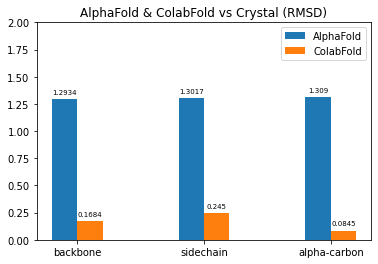

In [41]:
x_axis_name = ['backbone', 'sidechain', 'alpha-carbon']
x_axis = np.arange(len(x_axis_name))
y_alpha = Alpha_backbone + Alpha_sidechain + Alpha_alphaC
y_alpha = list(np.around(np.array(y_alpha), 4))
plt.bar(x_axis - 0.1, y_alpha, width = 0.2, label = 'AlphaFold')

for x,y in zip(x_axis - 0.1, y_alpha):
    label = "{}".format(y)
    
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize=7)

y_colab = Colab_backbone + Colab_sidechain + Colab_alphaC
y_colab = list(np.around(np
                         .array(y_colab), 4))
plt.bar(x_axis + 0.1, y_colab, width = 0.2, label = 'ColabFold')

for x,y in zip(x_axis + 0.1, y_colab):
    label = "{}".format(y)
    
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize=7)

plt.xticks(x_axis, x_axis_name)
plt.ylim(0, 2)
plt.legend()
plt.title('AlphaFold & ColabFold vs Crystal (RMSD)')
plt.show()